In [18]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
df=pd.read_csv(r"C:\Users\souvi\Documents\arthritis_dataset.csv")

In [3]:
df

,Age,Sex,RF,Anti_CCP,ESR,CRP,Joint_Pain_Score,Morning_Stiffness_Min,Swelling,Diagnosis
0,68,M,58.522205,68.241686,42.968148,26.430062,8.0,63.0,Yes,RA
1,32,F,48.414983,76.581207,34.863735,17.507484,8.0,66.0,Yes,RA
2,73,M,19.794247,4.329997,4.041025,4.336843,0.0,8.0,No,Healthy
3,36,M,24.068575,19.486803,8.713635,1.289043,6.0,17.0,No,OA
4,58,M,96.473063,69.639133,39.036350,18.913584,7.0,62.0,Yes,RA
...,...,...,...,...,...,...,...,...,...,...
995,43,M,82.439429,113.873268,29.415454,22.569640,7.0,50.0,Yes,RA
996,50,M,35.741133,11.513966,1.592468,6.997246,NaN,13.0,No,OA
997,39,M,34.126269,13.683099,3.856060,5.071656,NaN,27.0,No,OA
998,38,M,81.995884,74.590026,29.191959,9.558828,7.0,51.0,Yes,RA


In [4]:
label_encoder = LabelEncoder()
df["Diagnosis"] = label_encoder.fit_transform(df["Diagnosis"])

In [5]:
categorical_features = ['Sex', 'Swelling']

encoder = OneHotEncoder(drop='if_binary',sparse_output=False)
one_hot_encoded = encoder.fit_transform(df[categorical_features])

one_hot_df = pd.DataFrame(one_hot_encoded,columns=encoder.get_feature_names_out(categorical_features))

df = pd.concat([df.drop(categorical_features,axis=1),one_hot_df],axis=1)

In [6]:
df

,Age,RF,Anti_CCP,ESR,CRP,Joint_Pain_Score,Morning_Stiffness_Min,Diagnosis,Sex_M,Swelling_Yes
0,68,58.522205,68.241686,42.968148,26.430062,8.0,63.0,2,1.0,1.0
1,32,48.414983,76.581207,34.863735,17.507484,8.0,66.0,2,0.0,1.0
2,73,19.794247,4.329997,4.041025,4.336843,0.0,8.0,0,1.0,0.0
3,36,24.068575,19.486803,8.713635,1.289043,6.0,17.0,1,1.0,0.0
4,58,96.473063,69.639133,39.036350,18.913584,7.0,62.0,2,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
995,43,82.439429,113.873268,29.415454,22.569640,7.0,50.0,2,1.0,1.0
996,50,35.741133,11.513966,1.592468,6.997246,NaN,13.0,1,1.0,0.0
997,39,34.126269,13.683099,3.856060,5.071656,NaN,27.0,1,1.0,0.0
998,38,81.995884,74.590026,29.191959,9.558828,7.0,51.0,2,1.0,1.0


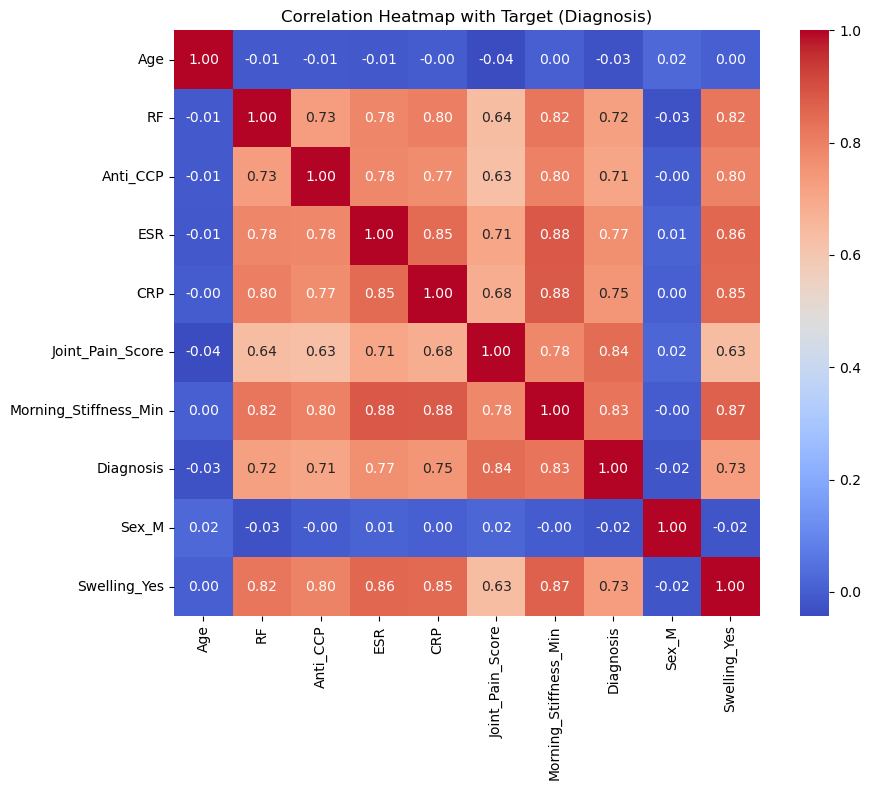

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title("Correlation Heatmap with Target (Diagnosis)")
plt.tight_layout()
plt.show()


In [8]:
df['Inflammation_Index'] = df['ESR'] + df['CRP']
df.drop(columns=['ESR', 'CRP'], inplace=True)

In [9]:
df

,Age,RF,Anti_CCP,Joint_Pain_Score,Morning_Stiffness_Min,Diagnosis,Sex_M,Swelling_Yes,Inflammation_Index
0,68,58.522205,68.241686,8.0,63.0,2,1.0,1.0,69.398210
1,32,48.414983,76.581207,8.0,66.0,2,0.0,1.0,52.371219
2,73,19.794247,4.329997,0.0,8.0,0,1.0,0.0,8.377868
3,36,24.068575,19.486803,6.0,17.0,1,1.0,0.0,10.002677
4,58,96.473063,69.639133,7.0,62.0,2,1.0,1.0,57.949934
...,...,...,...,...,...,...,...,...,...
995,43,82.439429,113.873268,7.0,50.0,2,1.0,1.0,51.985093
996,50,35.741133,11.513966,NaN,13.0,1,1.0,0.0,8.589714
997,39,34.126269,13.683099,NaN,27.0,1,1.0,0.0,8.927716
998,38,81.995884,74.590026,7.0,51.0,2,1.0,1.0,38.750787


In [10]:
X = df.drop(columns='Diagnosis')
y = df['Diagnosis']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

In [12]:
numeric_features = [
    'Age', 'RF', 'Anti_CCP', 'Joint_Pain_Score',
    'Morning_Stiffness_Min', 'Inflammation_Index'
]
categorical_features = ['Sex_M', 'Swelling_Yes']

X_train_num = X_train[numeric_features].copy()
X_test_num = X_test[numeric_features].copy()

X_train_cat = X_train[categorical_features].copy()
X_test_cat = X_test[categorical_features].copy()

num_imputer = SimpleImputer(strategy='median')
X_train_num_imputed = num_imputer.fit_transform(X_train_num)
X_test_num_imputed = num_imputer.transform(X_test_num)

scaler = StandardScaler()
X_train_num_scaled = scaler.fit_transform(X_train_num_imputed)
X_test_num_scaled = scaler.transform(X_test_num_imputed)


cat_imputer = SimpleImputer(strategy='most_frequent')
X_train_cat_imputed = cat_imputer.fit_transform(X_train_cat)
X_test_cat_imputed = cat_imputer.transform(X_test_cat)

In [13]:
X_train_final = np.hstack([X_train_num_scaled, X_train_cat_imputed])
X_test_final = np.hstack([X_test_num_scaled, X_test_cat_imputed])

In [14]:
X_train_final.shape,X_test_final.shape

((800, 8), (200, 8))

In [22]:
lr_model= LogisticRegression()
lr_model.fit(X_train_final,y_train)
y_pred=lr_model.predict(X_test_final)
accuracy_score(y_test,y_pred)

0.935

In [25]:
param_grid_lr = {
    'max_iter':[1000,5000,10000],
    'C': [0.01, 0.1, 1, 10],
    'solver': ['lbfgs', 'saga'],
    'multi_class': ['multinomial']
}

grid_search_lr = GridSearchCV(lr_model, param_grid_lr, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search_lr.fit(X_train_final, y_train)

best_model= grid_search_lr.best_estimator_
print(grid_search_lr.best_score_)
print(grid_search_lr.best_params_)

y_pred=best_model.predict(X_test_final)
accuracy_score(y_test,y_pred)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
0.94625
{'C': 0.01, 'max_iter': 1000, 'multi_class': 'multinomial', 'solver': 'lbfgs'}


0.935